<a href="https://colab.research.google.com/github/serskinek/seed-labs/blob/master/Copy_of_Unit_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit - 4.2 : Assignment for Unit 4.**


# Assignment 4.2 (There are 10 gaps (1-10) as exercises. Fill the blanks and then run the code to be executed properly.)

This code segment involves logistic regression (LR) classification using scikit-learn. It creates an LR classifier, fits it to the training data (X_train and y_train), makes predictions on the test data (X_test), and generates a classification report (class_report) for evaluating the model's performance. The report includes metrics such as precision, recall, F1-score, and support for each class in the classification problem. Finally, the report is printed to assess the model's classification performance.

This code sets up the necessary libraries and functions for building and evaluating machine learning models, particularly logistic regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving phishing_dataset.csv to phishing_dataset.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['phishing_dataset.csv']), delimiter=',', dtype=np.int32)


**1. Fill the gap so that it displays the first 4 obserbvations of dataframe.**

In [ ]:
df.tail(4)

,-1,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,...,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15,-1.16
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


**2. Fill the gap so that it displays the last 10 obserbvations of dataframe.**

In [ ]:
df.tail(10)

,-1,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,...,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15,-1.16
11044,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11045,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,0,-1,1,1,1,1
11046,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11047,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
X

,-1,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,...,1.8,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


**Here's how the test_size parameter works:**

In scikit-learn's train_test_split function, the test_size parameter is used to determine the proportion of the dataset that should be allocated to the test set when splitting your data into training and testing subsets. The train_test_split function is commonly used for splitting a dataset into a training set and a testing set for machine learning purposes.
test_size: This parameter specifies the proportion of the dataset that should be allocated to the test set. It can be specified as a float.






**3. Now fill the gap to assign test_size with 20% in train_test_split.**

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**4. Fill the gap to create Logistic Regression model.**

In [ ]:

LR = LogisticRegression()                              # create Logistic Regression
LR.fit(X_train,y_train)

LogisticRegression()

**5. Fill the gap so that the predict() method is called through trained model to make predictions.**

In [ ]:
y_pred= LR.predict(X_test)
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91       942
           1       0.93      0.94      0.94      1269

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.92      2211
weighted avg       0.93      0.93      0.93      2211



**6. Fill the gap in *confusion_matrix()* so that it works.**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
predicted_probab_log = LR.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9244076031581113

# Assignment 4.2.2 AUC ROC Curve for Phishing Detection

This code segment uses Matplotlib in Python to create an ROC (Receiver Operating Characteristic) curve for a logistic regression model. It plots the False Positive Rate (FPR) against the True Positive Rate (TPR) with red markers and labels it as 'Logistic Regression.' The plot includes a diagonal red dashed line representing random guessing. The chart is titled 'AUC ROC Curve for Phishing Detection,' with labeled axes for FPR and TPR. Finally, a legend is added, and the plot is displayed to visualize the model's performance.




**7. Fill the gap in plot() so that it works.**

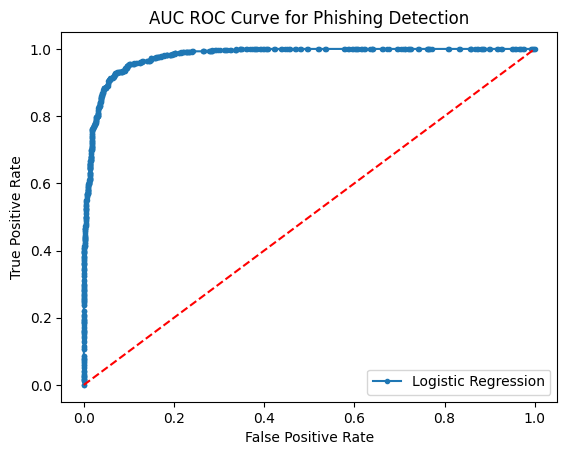

In [ ]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr, marker='.', label='Logistic Regression') # Fill up the blank
plt.title('AUC ROC Curve for Phishing Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], 'r--') # change the color RED into BLUE
plt.legend()
plt.show()

# **Decision Tree:**

**8. Add the two parameters in fit() so that it works.**

In [ ]:
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_test, y_pred)
y_pred_dt = tree_classifier.predict(X_test)
class_report_dt = classification_report(y_test,y_pred_dt)
print(class_report_dt)

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91       942
           1       0.93      0.94      0.94      1269

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.92      2211
weighted avg       0.93      0.93      0.93      2211



In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
predicted_probab_log = tree_classifier.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr_d, tpr_d, _ = roc_curve(y_test, predicted_probab_log)

In [ ]:
auc = roc_auc_score(y_test, y_pred_dt)
auc

0.9244076031581113

9. Put the title **"AUC ROC Curve for Phishing Detection"** in the second line

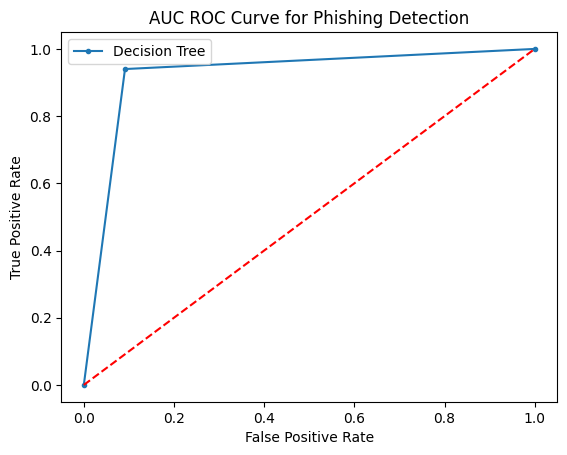

In [ ]:
plt.plot(fpr_d, tpr_d, marker='.', label='Decision Tree')
plt.title('AUC ROC Curve for Phishing Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], 'r--')
plt.legend()
plt.show()

**10. Assign "Logistic Regression" in label parameter in plot() at second line..**

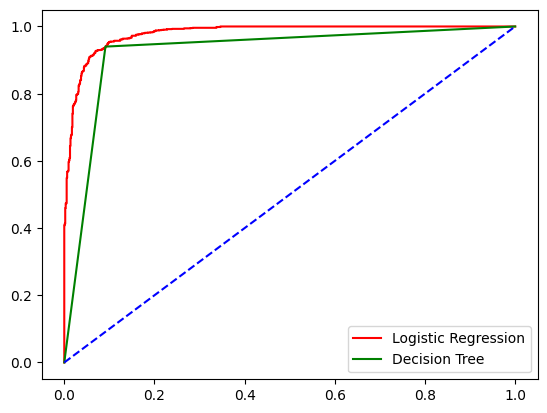

In [ ]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='r', label='Logistic Regression')
ax.plot(fpr_d, tpr_d, color='g', label='Decision Tree')
ax.plot([0, 1], [0, 1], 'b--')
leg = ax.legend()

                                                       # END